In [1]:
import logging
logging.basicConfig(level=logging.DEBUG)

import graphcat.notebook
import imagecat.notebook

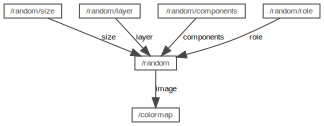

In [2]:
graph = graphcat.Graph()
imagecat.add_operation(graph, "/random", imagecat.uniform, size=(32, 32), layer="L", components=[""], role=imagecat.Role.NONE)
imagecat.add_operation(graph, "/colormap", imagecat.colormap)
graph.add_links("/random", ("/colormap", "image"))
graphcat.notebook.display(graph)

INFO:imagecat:Task /random uniform:
INFO:imagecat:  components: ['']
INFO:imagecat:  layer: L
INFO:imagecat:  role: Role.NONE
INFO:imagecat:  seed: 1234
INFO:imagecat:  size: [32 32]
INFO:imagecat:  output: Image(L: Layer(32x32x1 float16 [''] Role.NONE))



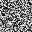

In [3]:
imagecat.notebook.display(graph.output("/random"), height="300px")

In [4]:
graph.output("/colormap")

INFO:imagecat:Task /colormap colormap:
INFO:imagecat:  layers: *
INFO:imagecat:  mapping: functools.partial(<function linear_map at 0x7f8b4749b710>, palette=<imagecat.color.Palette object at 0x7f8b4759ad90>)
INFO:imagecat:  output: Image(L: Layer(32x32x3 float64 ['r', 'g', 'b'] Role.RGB))


Image(L: Layer(32x32x3 float64 ['r', 'g', 'b'] Role.RGB))


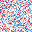

In [5]:
imagecat.notebook.display(graph.output("/colormap"))